**TASK-2**

Sales Prediction

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('/content/Advertising.csv')
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Training, testing, splitting

In [9]:
x=data.drop(columns=['Unnamed: 0','Sales'],axis=1)
y=data.Sales

In [10]:
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [11]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


Model training

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [13]:
x.shape,x_train.shape,x_test.shape

((200, 3), (180, 3), (20, 3))

In [14]:
model=LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
x_train_prediction=model.predict(x_train)

In [17]:
x_train_score=r2_score(y_train,x_train_prediction)

In [18]:
print(x_train_score)

0.9025407988209103


Visualizing actual price and predicted price

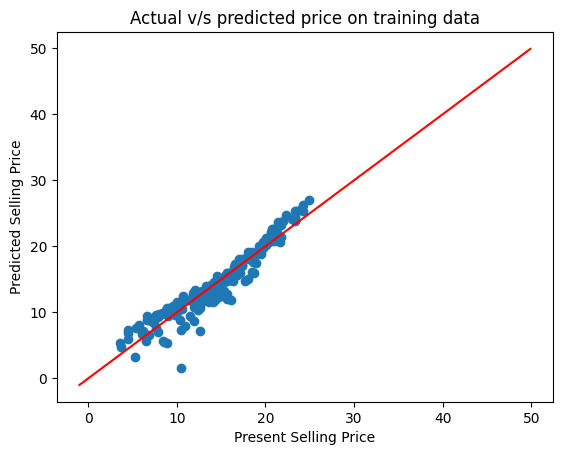

In [23]:
plt.scatter(x_train_prediction,y_train)
plt.xlabel('Present Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual v/s predicted price on training data')
x=np.arange(-1,50,0.1)
y=np.arange(-1,50,0.1)
plt.plot(x,y,color="red")
plt.show()

In [19]:
x_test_prediction=model.predict(x_test)

In [20]:
x_test_score=r2_score(y_test,x_test_prediction)

In [21]:
print(x_test_score)

0.8169646763804373


Visualizing actual price and predicted price

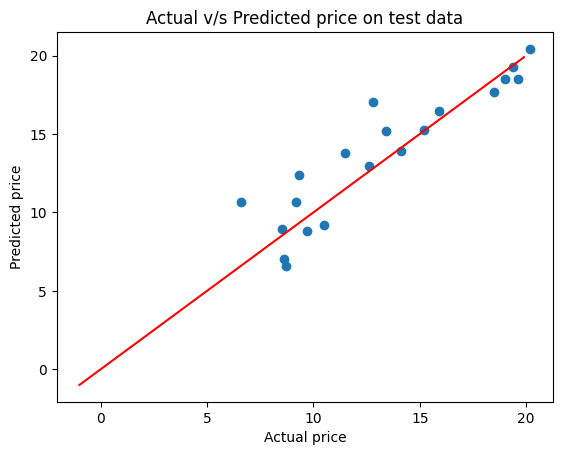

In [24]:
plt.scatter(y_test,x_test_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title('Actual v/s Predicted price on test data')
x=np.arange(-1,20,0.1)
y=np.arange(-1,20,0.1)
plt.plot(x,y,color='red')
plt.show()


Building predictive system

In [22]:
input=(44.5,39.3,45.1)
input_data_as_numpy_array=np.asarray(input)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
#std_data=scaler.fit_transform(input_data_reshape)
#print(std_data)
prediction=model.predict(input_data_reshape)
print(prediction)

[12.402058]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
